# 《绘制中国疫情地图》
- 参考 https://www.cnblogs.com/ameile/p/6694982.html

## （1）下载中国地图 Shapefile 文件
- https://gadm.org/download_country_v3.html 

**Shapefile 文件** 最少包括三个文件：
- 主文件（*.shp） 存储地理要素的几何图形的文件
- 索引文件（*.shx） 存储图形要素与属性信息索引的文件
- dBASE表文件（*.dbf） 存储要素信息属性的dBase表文件

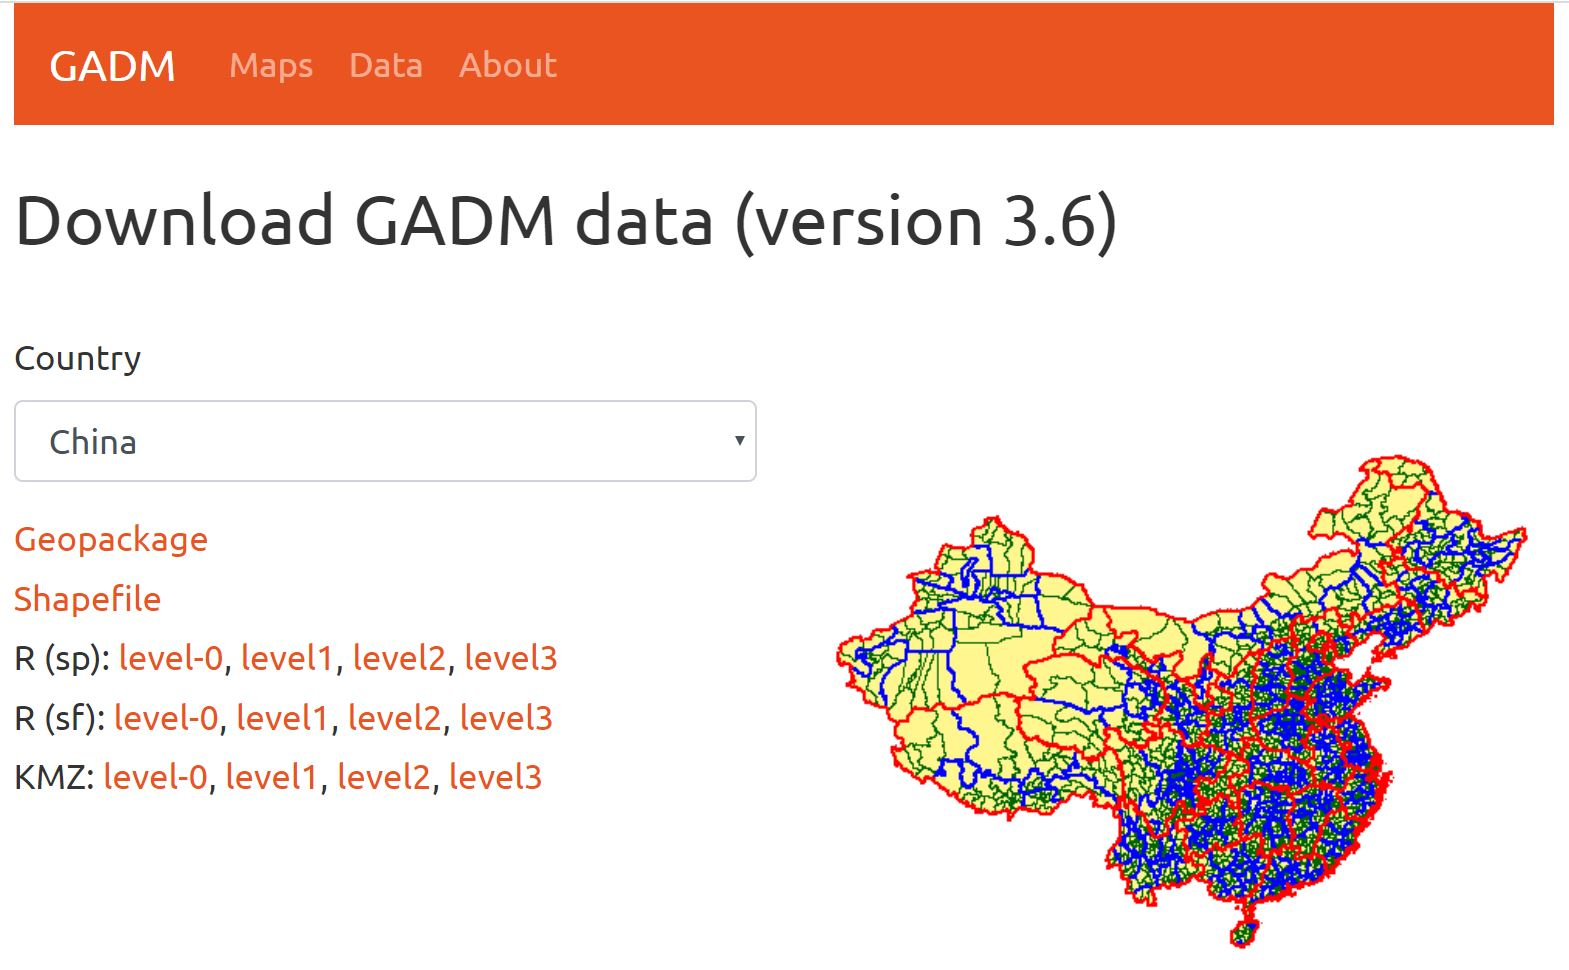

In [6]:
from IPython.display import Image
Image("data/china_cadm_show.jpg", width=800)

## （2）绘制地图

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection

Tips：**ModuleNotFoundError: No module named 'mpl_toolkits.basemap'**

1. 安装pyproj：
    - pip install pyproj -i https://pypi.tuna.tsinghua.edu.cn/simple
2. 下载 basemap*.whl 文件
    - windows: https://www.lfd.uci.edu/~gohlke/pythonlibs/#basemap 
    - linux: https://blog.csdn.net/tterminator/article/details/94386080
3. 安装 basemap
   - pip install basemap*.whl

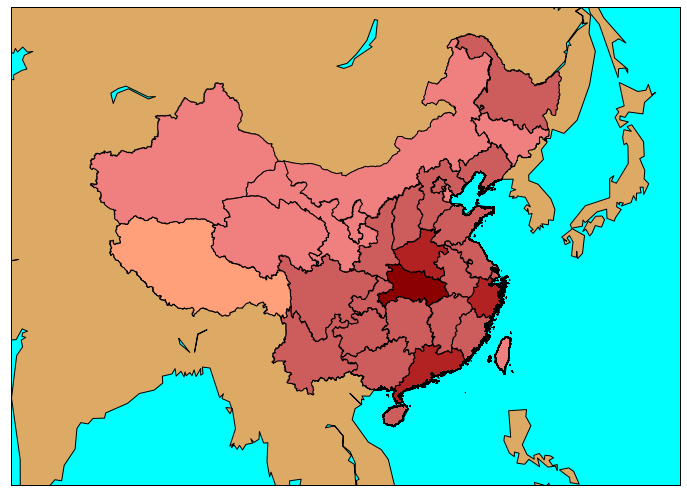

In [9]:
if __name__ == '__main__':
    # 1.准备数据
    info_dic = {}
    provinces = ['湖北','广东','浙江','河南','湖南','安徽','江西','江苏','重庆','山东','四川','北京','黑龙江','上海','福建','河北','陕西','广西','云南','海南','山西','贵州','辽宁','天津','甘肃','吉林','内蒙古','新疆','宁夏','香港','青海','台湾','澳门','西藏']
    nums =[29631,1151,1092,1073,879,830,771,492,468,466,405,337,331,299,261,218,213,210,141,136,119,109,107,94,83,80,58,49,49,36,18,18,10,1]
    
    for i in range(len(provinces)):
        info_dic[provinces[i]] = str(nums[i])
 

    # 2.不同数值区间设置不同的颜色深浅
    colors = ['darkred','firebrick','indianred','lightcoral','lightsalmon']
    for name in info_dic.keys():
        # print(name)
        if int(info_dic[name])>=10000:
            info_dic[name]= 'darkred'
        elif 1000<int(info_dic[name])<9999:
            info_dic[name]= 'firebrick'
        elif 100<int(info_dic[name])<999:
            info_dic[name]= 'indianred'
        elif 10<int(info_dic[name])<99:
            info_dic[name]='lightcoral'
        else:
            info_dic[name]='lightsalmon'
 
    # 3.绘制地图
    map1 = Basemap(projection='lcc',  # 投影方法：lcc:平面投影/ortho:球体投影
                    width=7000000,
                    height=5000000,
                    lat_0=35,  #维度（中国：纬度范围:3°51′N至53°33′N ）
                    lon_0=105) #经度（中国：经度范围:73°33′E至135°05′E） #东经105 北纬35
   
    plt.figure(figsize=(12,9)) #画布大小
    map1.drawmapboundary(fill_color='aqua') #地球涂色蓝色
    map1.fillcontinents(color='#ddaa66', lake_color='aqua') # 陆地、江河湖泊上色
    map1.drawcoastlines()
    
    # 读取地图的 shapefile
    map1.readshapefile('data/map/gadm36_CHN_1', 'prov')   #原本地图
    map1.readshapefile('data/map/gadm36_TWN_0', 'taiwan') #单独添加台湾地图
        
#     print(map1.prov_info)
#     print(map1.prov)  
#     print(list(zip(map1.prov_info, map1.prov)))
 
    ax = plt.gca()  #  获取当前子图
    for name in provinces:
        patch = []
        if name != '台湾':
             # 将每个省的地图信息与坐标合并成元组，shape 表示多边形坐标
            for info, shape in zip(map1.prov_info, map1.prov): 
                if name in info['NL_NAME_1']:  # map1.prov_info 中'NL_NAME_1': '遼寧|辽宁',
                    patch.append(Polygon(np.array(shape), 
                                         closed=True))  # 将多边形顶点连接绘制多边形
                    
            # “地图信息+坐标”组成的元组添加到图中
            ax.add_collection(
                PatchCollection(
                    patch, 
                    facecolor=info_dic[name], # 取提前设置的颜色
                    edgecolor='k', 
                    linewidths=1., 
                    zorder=2))
        else:
            for info, shape in zip(map1.taiwan_info, map1.taiwan):
                if info['NAME_0'] == "Taiwan":
                    patch.append(Polygon(np.array(shape), 
                                          closed=True) )
            ax.add_collection(
                PatchCollection(patch, 
                                facecolor=info_dic['台湾'], 
                                edgecolor='k',
                                linewidths=1.,
                                zorder=2))
 
    plt.show()

In [8]:
help(Basemap)

Help on class Basemap in module mpl_toolkits.basemap:

class Basemap(builtins.object)
 |  Basemap(llcrnrlon=None, llcrnrlat=None, urcrnrlon=None, urcrnrlat=None, llcrnrx=None, llcrnry=None, urcrnrx=None, urcrnry=None, width=None, height=None, projection='cyl', resolution='c', area_thresh=None, rsphere=6370997.0, ellps=None, lat_ts=None, lat_1=None, lat_2=None, lat_0=None, lon_0=None, lon_1=None, lon_2=None, o_lon_p=None, o_lat_p=None, k_0=None, no_rot=False, suppress_ticks=True, satellite_height=35786000, boundinglat=None, fix_aspect=True, anchor='C', celestial=False, round=False, epsg=None, ax=None)
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x, y, inverse=False)
 |      Calling a Basemap class instance with the arguments lon, lat will
 |      convert lon/lat (in degrees) to x/y map projection
 |      coordinates (in meters).  If optional keyword ``inverse`` is
 |      True (default is False), the inverse transformation from x/y
 |      to lon/lat is performed.
 |      
 | 